In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime 

df = pd.read_csv('/Users/ladipo/Desktop/Charter/charter_pricepred/data/processed/data_generation.csv')
df.head()

,Charter Date,Vessel Type,Charter Price ($/day),Duration (days),LNG Capacity (m),LPG Capacity (m),Cargo Capacity (DWT),Container Capacity (TEU),Size Category,Cargo Type,Vessel Length (m),Vessel breadth (m),Fuel Cost ($/liter)
0,2022-11-12,Tanker,22141,352,NaN,NaN,175514.0,NaN,Aframax,Refined Products,142,56,0.67
1,2022-11-09,Bulk Carrier,11745,141,NaN,NaN,168212.0,NaN,Handysize,Iron Ore,274,28,0.57
2,2022-06-05,Container Ship,29637,202,NaN,NaN,NaN,4076.0,Post-Panamax Ships,Consumer Goods,145,23,0.63
3,2022-12-17,Bulk Carrier,29642,398,NaN,NaN,53582.0,NaN,Panamax,Coal,248,55,0.51
4,2023-07-17,Tanker,21126,137,NaN,NaN,148814.0,NaN,ULCC,Refined Products,113,27,0.58


In [3]:
df.iloc[:, [0, 1, 2, 3]]

,Charter Date,Vessel Type,Charter Price ($/day),Duration (days)
0,2022-11-12,Tanker,22141,352
1,2022-11-09,Bulk Carrier,11745,141
2,2022-06-05,Container Ship,29637,202
3,2022-12-17,Bulk Carrier,29642,398
4,2023-07-17,Tanker,21126,137
...,...,...,...,...
2495,2022-06-25,Bulk Carrier,16990,201
2496,2022-02-05,LPG Carrier,22901,203
2497,2021-01-25,LPG Carrier,34747,162
2498,2021-03-13,LNG Carrier,51083,161


In [4]:
df.isnull().sum()

Charter Date                   0
Vessel Type                    0
Charter Price ($/day)          0
Duration (days)                0
LNG Capacity (m)            1994
LPG Capacity (m)            2031
Cargo Capacity (DWT)        1450
Container Capacity (TEU)    2025
Size Category                  0
Cargo Type                     0
Vessel Length (m)              0
Vessel breadth (m)             0
Fuel Cost ($/liter)            0
dtype: int64

In [5]:
#Made all values lower case and replaced space with underscore for smooth reading
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['charter_date', 'vessel_type', 'charter_price_($/day)',
       'duration_(days)', 'lng_capacity_(m)', 'lpg_capacity_(m)',
       'cargo_capacity_(dwt)', 'container_capacity_(teu)', 'size_category',
       'cargo_type', 'vessel_length_(m)', 'vessel_breadth_(m)',
       'fuel_cost_($/liter)'],
      dtype='object')

In [6]:
df['vessel_type'].value_counts()

vessel_type
Tanker            528
Bulk Carrier      522
LNG Carrier       506
Container Ship    475
LPG Carrier       469
Name: count, dtype: int64

In [7]:
# Handling Nan by filling with 0. All columns useful so no dropping
df = df.fillna(0)
df.head()

,charter_date,vessel_type,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),size_category,cargo_type,vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter)
0,2022-11-12,Tanker,22141,352,0.0,0.0,175514.0,0.0,Aframax,Refined Products,142,56,0.67
1,2022-11-09,Bulk Carrier,11745,141,0.0,0.0,168212.0,0.0,Handysize,Iron Ore,274,28,0.57
2,2022-06-05,Container Ship,29637,202,0.0,0.0,0.0,4076.0,Post-Panamax Ships,Consumer Goods,145,23,0.63
3,2022-12-17,Bulk Carrier,29642,398,0.0,0.0,53582.0,0.0,Panamax,Coal,248,55,0.51
4,2023-07-17,Tanker,21126,137,0.0,0.0,148814.0,0.0,ULCC,Refined Products,113,27,0.58


In [8]:
df.dtypes

charter_date                 object
vessel_type                  object
charter_price_($/day)         int64
duration_(days)               int64
lng_capacity_(m)            float64
lpg_capacity_(m)            float64
cargo_capacity_(dwt)        float64
container_capacity_(teu)    float64
size_category                object
cargo_type                   object
vessel_length_(m)             int64
vessel_breadth_(m)            int64
fuel_cost_($/liter)         float64
dtype: object

In [9]:
df.describe()

,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,29926.203600,248.198000,25311.926000,7951.654800,69237.848400,1663.015600,211.996400,38.322000,0.649652
std,11633.247061,118.698631,50694.493295,19069.982552,104091.216306,3705.429553,71.386427,12.439172,0.086105
min,10046.000000,45.000000,0.000000,0.000000,0.000000,0.000000,70.000000,14.000000,0.500000
25%,21401.500000,147.000000,0.000000,0.000000,0.000000,0.000000,154.000000,28.000000,0.580000
50%,28311.000000,244.500000,0.000000,0.000000,0.000000,0.000000,214.000000,40.000000,0.650000
75%,37888.000000,352.000000,0.000000,0.000000,123436.500000,0.000000,263.250000,48.000000,0.720000
max,59984.000000,450.000000,149999.000000,79910.000000,399326.000000,13998.000000,399.000000,65.000000,0.800000


In [10]:
for col in df:
    print(df.duplicated().sum())
    print(df.shape)
    print(df.isnull().sum())

0
(2500, 13)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
duration_(days)             0
lng_capacity_(m)            0
lpg_capacity_(m)            0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
size_category               0
cargo_type                  0
vessel_length_(m)           0
vessel_breadth_(m)          0
fuel_cost_($/liter)         0
dtype: int64
0
(2500, 13)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
duration_(days)             0
lng_capacity_(m)            0
lpg_capacity_(m)            0
cargo_capacity_(dwt)        0
container_capacity_(teu)    0
size_category               0
cargo_type                  0
vessel_length_(m)           0
vessel_breadth_(m)          0
fuel_cost_($/liter)         0
dtype: int64
0
(2500, 13)
charter_date                0
vessel_type                 0
charter_price_($/day)       0
duration_(days)             0
lng_capacity_(m)            0
lpg_c

In [11]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Number of duplicates in column '{col}': {df[col].duplicated().sum()}")
    print(f"Shape of DataFrame: {df.shape}")
    print(f"Number of null values in column '{col}': {df[col].isnull().sum()}")
    print("-" * 40)


Column: charter_date
Number of duplicates in column 'charter_date': 1519
Shape of DataFrame: (2500, 13)
Number of null values in column 'charter_date': 0
----------------------------------------
Column: vessel_type
Number of duplicates in column 'vessel_type': 2495
Shape of DataFrame: (2500, 13)
Number of null values in column 'vessel_type': 0
----------------------------------------
Column: charter_price_($/day)
Number of duplicates in column 'charter_price_($/day)': 84
Shape of DataFrame: (2500, 13)
Number of null values in column 'charter_price_($/day)': 0
----------------------------------------
Column: duration_(days)
Number of duplicates in column 'duration_(days)': 2094
Shape of DataFrame: (2500, 13)
Number of null values in column 'duration_(days)': 0
----------------------------------------
Column: lng_capacity_(m)
Number of duplicates in column 'lng_capacity_(m)': 1994
Shape of DataFrame: (2500, 13)
Number of null values in column 'lng_capacity_(m)': 0
-----------------------

### Exploratory Data Analysis 

### Vessel Type, Category and Cargo Type

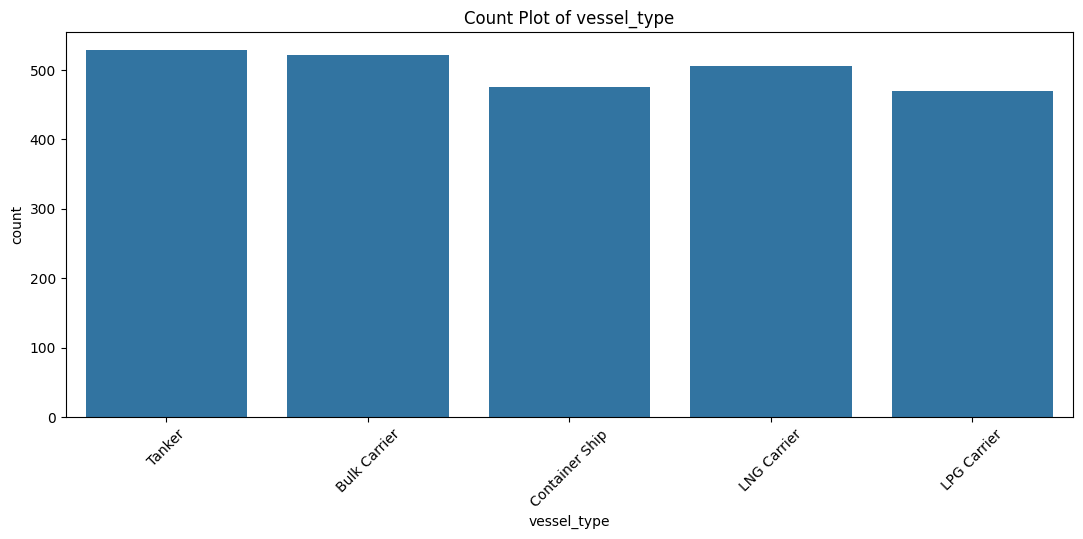

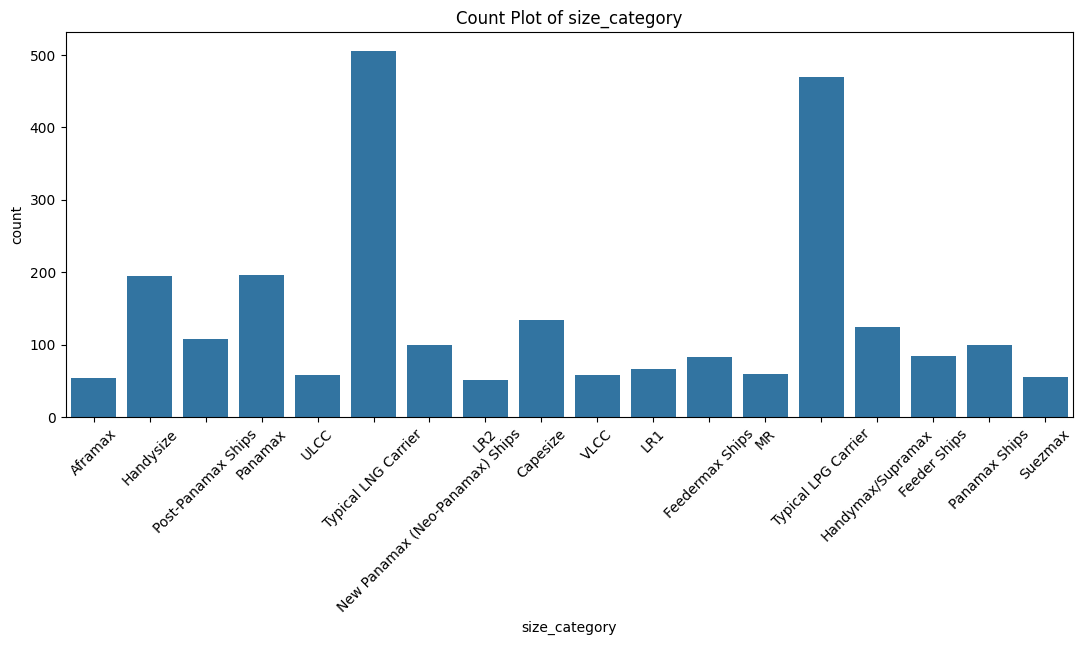

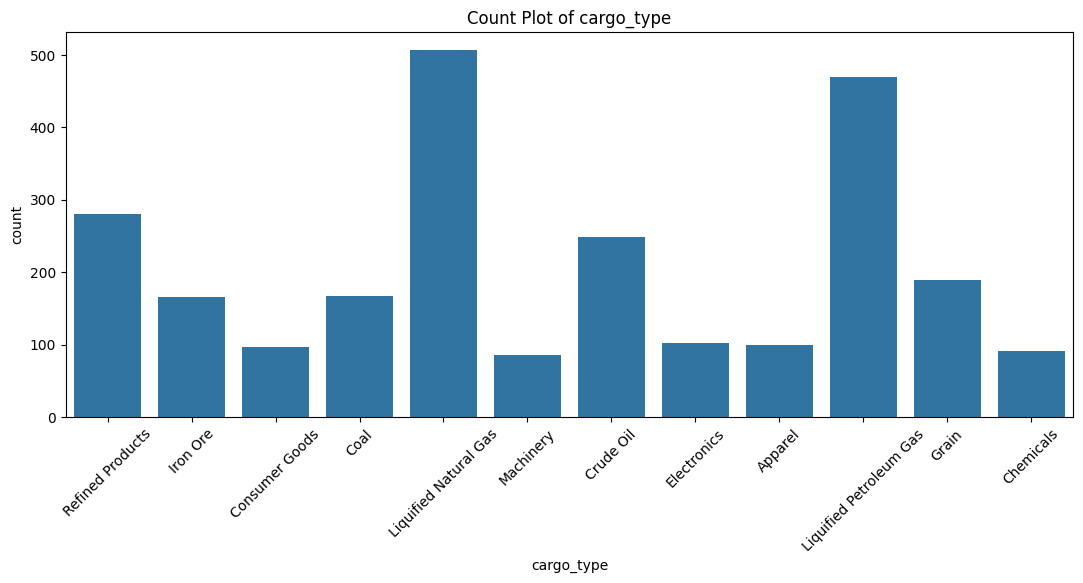

In [12]:
cat_var = ['vessel_type', 'size_category', 'cargo_type']

for col in cat_var:
    plt.figure(figsize = (13, 5))
    sns.countplot(x = df[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 45)
    plt.show()

In [13]:
for col in ['vessel_type', 'size_category', 'cargo_type']:
    print(df.groupby(col)['charter_price_($/day)'].describe())

                count          mean           std      min       25%      50%  \
vessel_type                                                                     
Bulk Carrier    522.0  20309.852490   5806.879092  10058.0  15323.00  20496.5   
Container Ship  475.0  22290.629474   7255.950746  10046.0  15962.00  22201.0   
LNG Carrier     506.0  43007.806324  10241.557635  25014.0  34448.50  42560.5   
LPG Carrier     469.0  31656.415778   6896.548180  20012.0  25196.00  31673.0   
Tanker          528.0  32228.992424  10092.922981  15049.0  23882.75  31456.0   

                     75%      max  
vessel_type                        
Bulk Carrier    25381.75  29894.0  
Container Ship  28430.00  34998.0  
LNG Carrier     52172.00  59984.0  
LPG Carrier     37800.00  42969.0  
Tanker          41076.00  49990.0  
                                 count          mean           std      min  \
size_category                                                                 
Aframax               

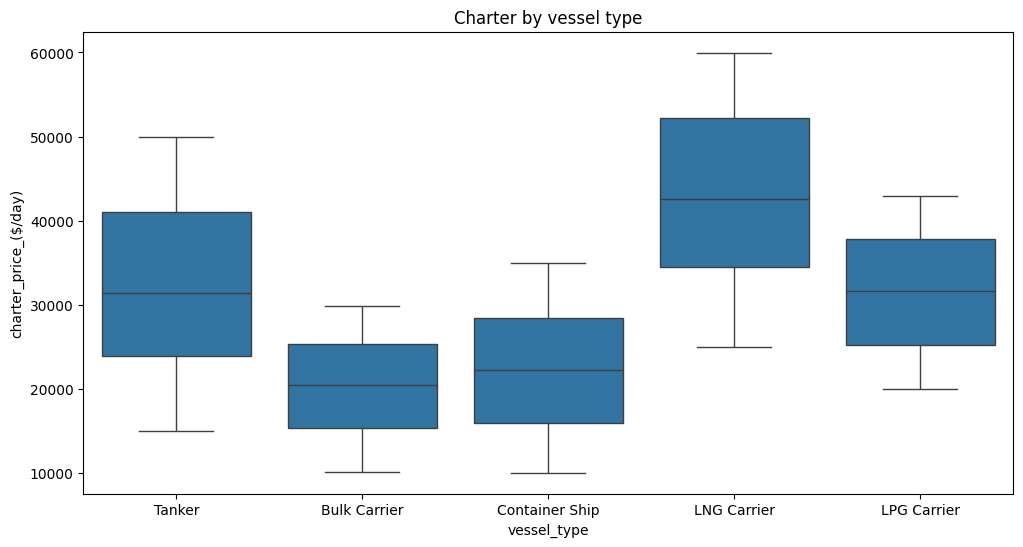

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'vessel_type' , y = 'charter_price_($/day)')
plt.title('Charter by vessel type')
plt.show()

### Date Analysis and Time Series plot

In [15]:
#Sorting date out 

df['charter_date'] = pd.to_datetime(df['charter_date'])
df['year'] = df['charter_date'].dt.year
df['month'] = df['charter_date'].dt.month
df['day'] = df['charter_date'].dt.day


In [16]:
df.head()

,charter_date,vessel_type,charter_price_($/day),duration_(days),lng_capacity_(m),lpg_capacity_(m),cargo_capacity_(dwt),container_capacity_(teu),size_category,cargo_type,vessel_length_(m),vessel_breadth_(m),fuel_cost_($/liter),year,month,day
0,2022-11-12,Tanker,22141,352,0.0,0.0,175514.0,0.0,Aframax,Refined Products,142,56,0.67,2022,11,12
1,2022-11-09,Bulk Carrier,11745,141,0.0,0.0,168212.0,0.0,Handysize,Iron Ore,274,28,0.57,2022,11,9
2,2022-06-05,Container Ship,29637,202,0.0,0.0,0.0,4076.0,Post-Panamax Ships,Consumer Goods,145,23,0.63,2022,6,5
3,2022-12-17,Bulk Carrier,29642,398,0.0,0.0,53582.0,0.0,Panamax,Coal,248,55,0.51,2022,12,17
4,2023-07-17,Tanker,21126,137,0.0,0.0,148814.0,0.0,ULCC,Refined Products,113,27,0.58,2023,7,17


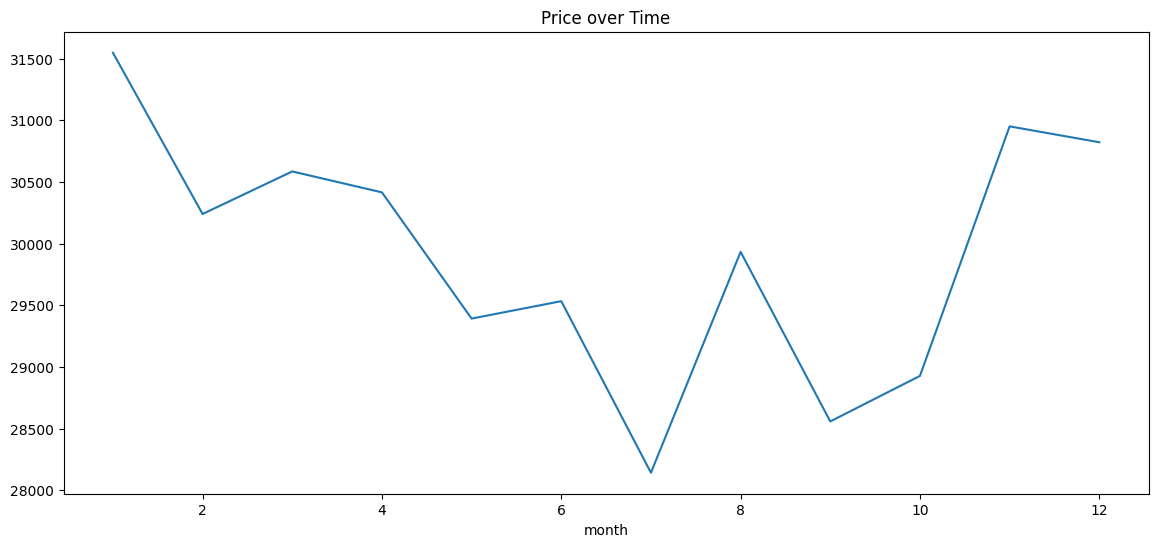

In [17]:
import matplotlib.dates as mdates

plt.figure(figsize = (14,6))
df.groupby('month')['charter_price_($/day)'].mean().plot()
plt.title('Price over Time')

plt.show()

### Capacity and Dimensions (length(m)) Analysis

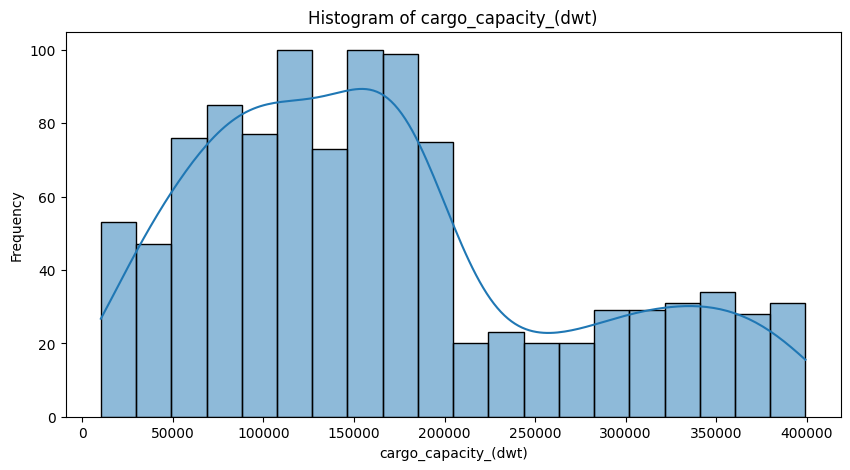

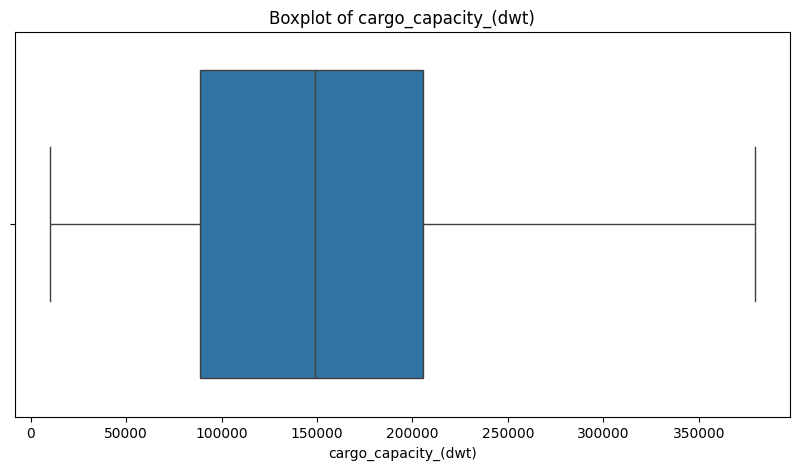

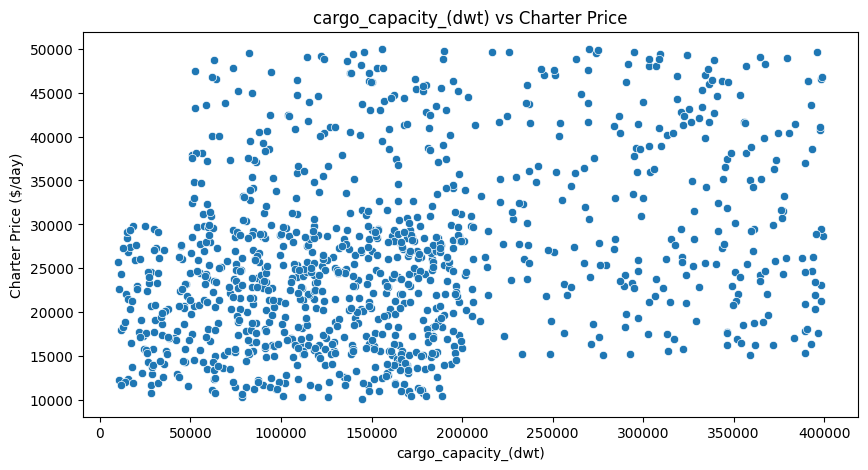

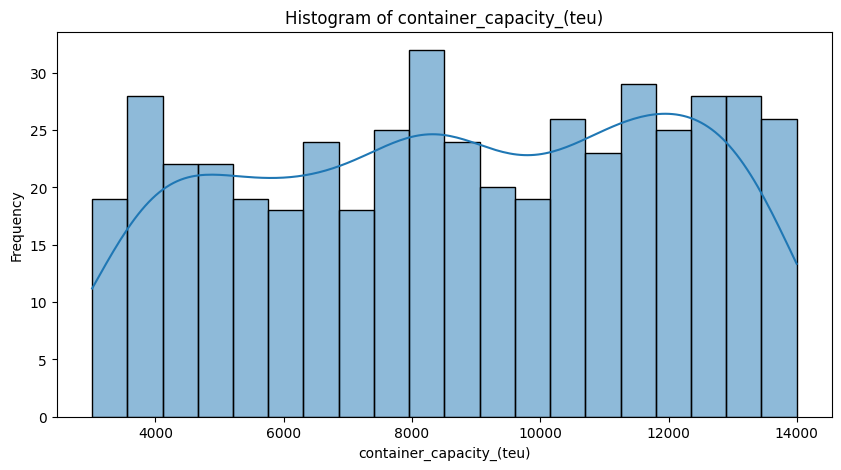

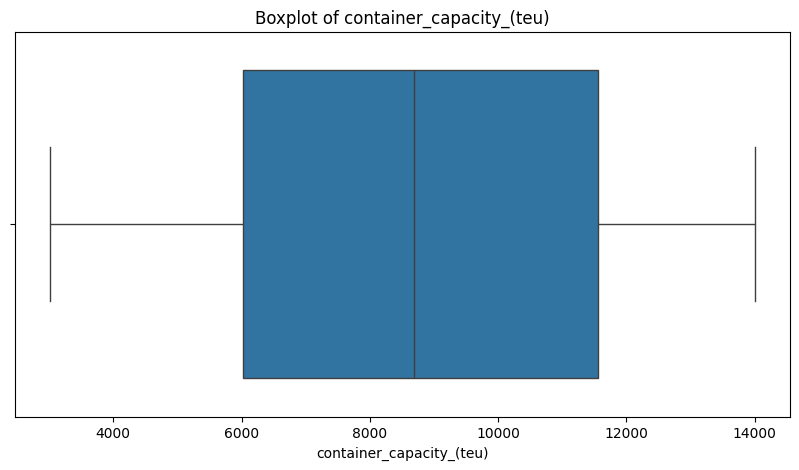

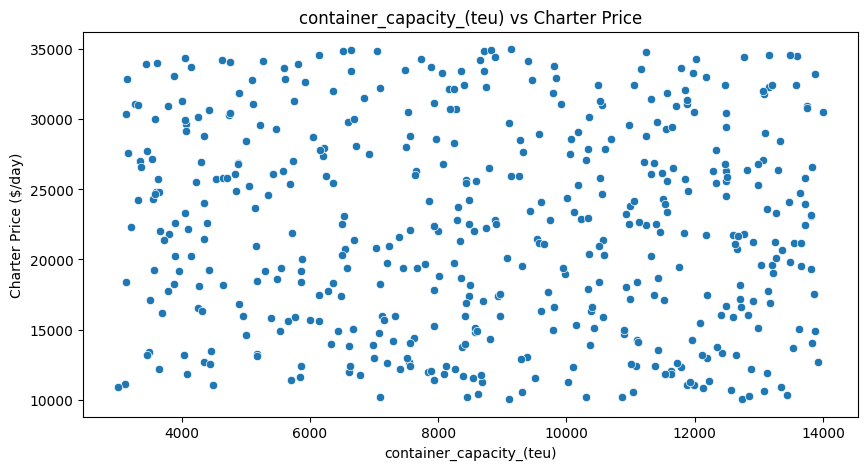

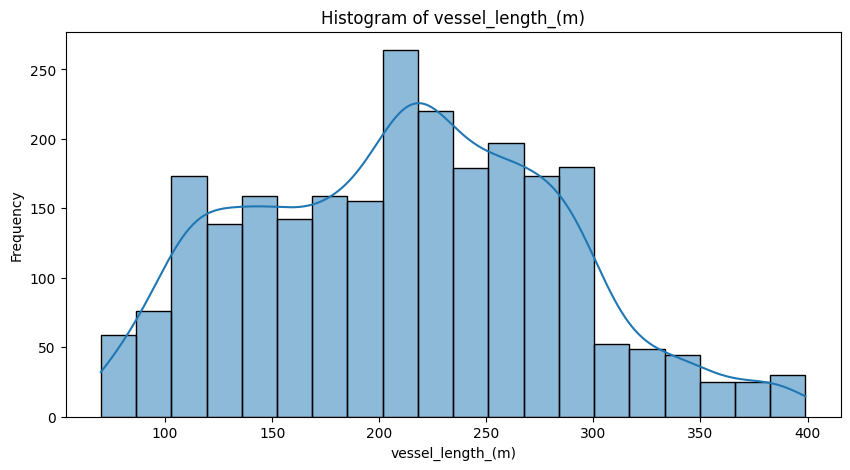

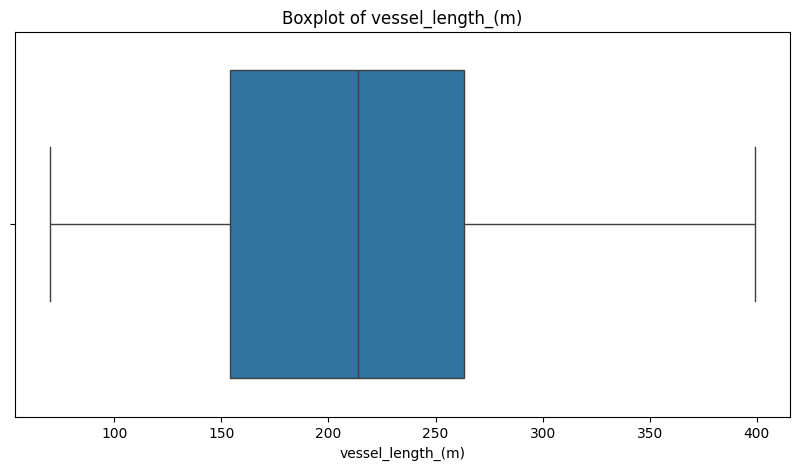

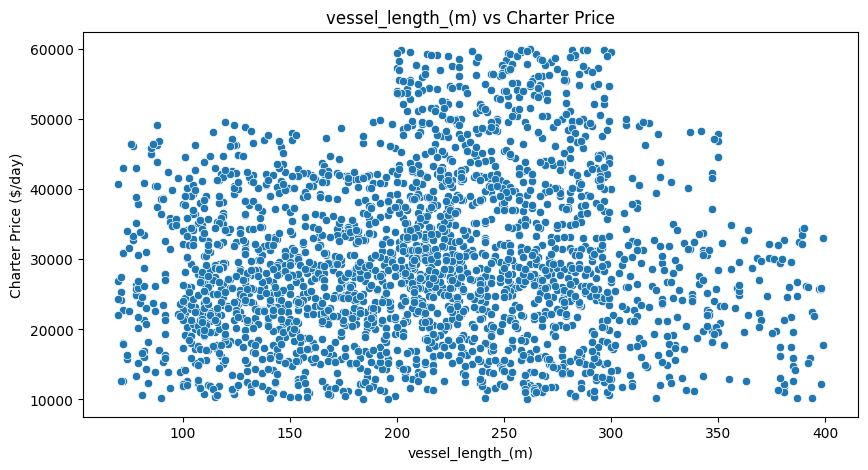

In [18]:
# Histograms and Boxplots for cargo capacity, container capacity, vessel length, and vessel breadth
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)']
for col in numerical_cols_1:

    filtered =  df[df[col] > 0]

    plt.figure(figsize=(10, 5))
    sns.histplot(filtered[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=filtered[col], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=filtered, x=col, y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


In [19]:
# Column names being observed 
numerical_cols_1 = ['cargo_capacity_(dwt)', 'container_capacity_(teu)', 'vessel_length_(m)']
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']
numerical_cols_3 = ['lng_capacity_(m)', 'lpg_capacity_(m)']

### Charter Price, Duration, Fuel Cost Analysis

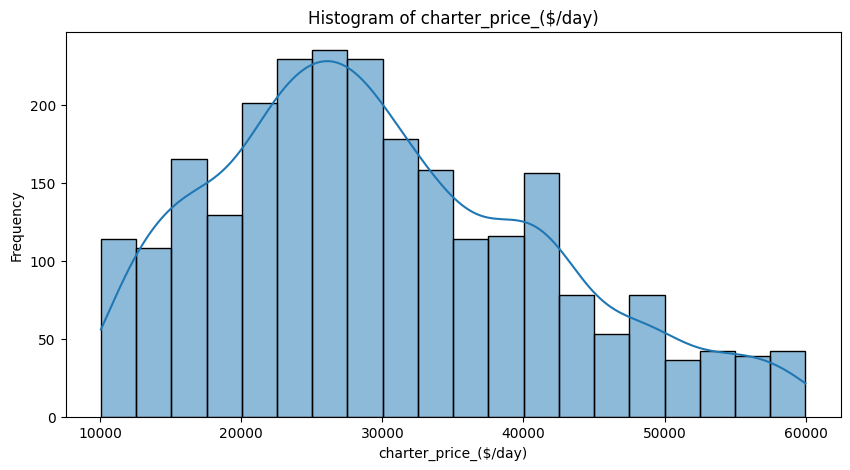

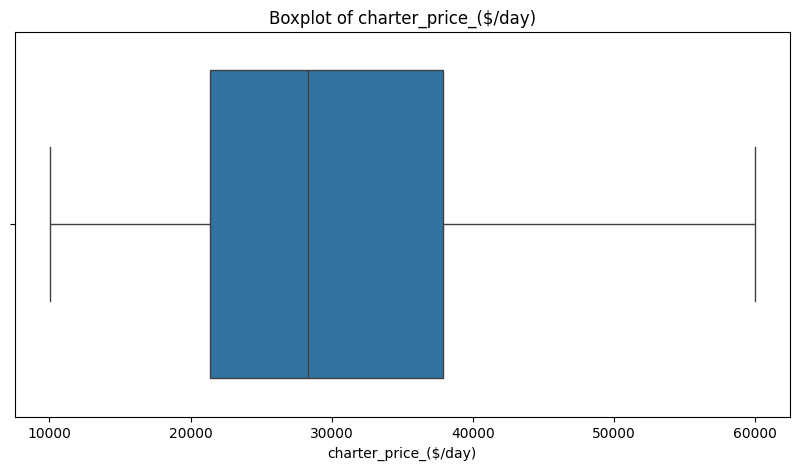

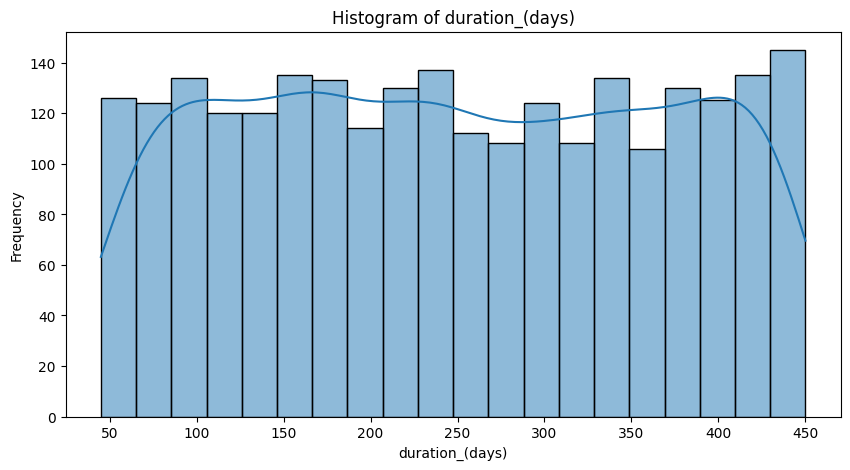

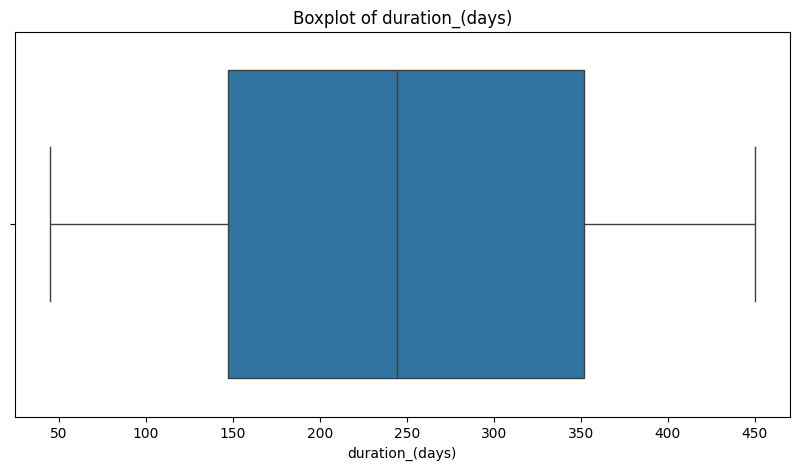

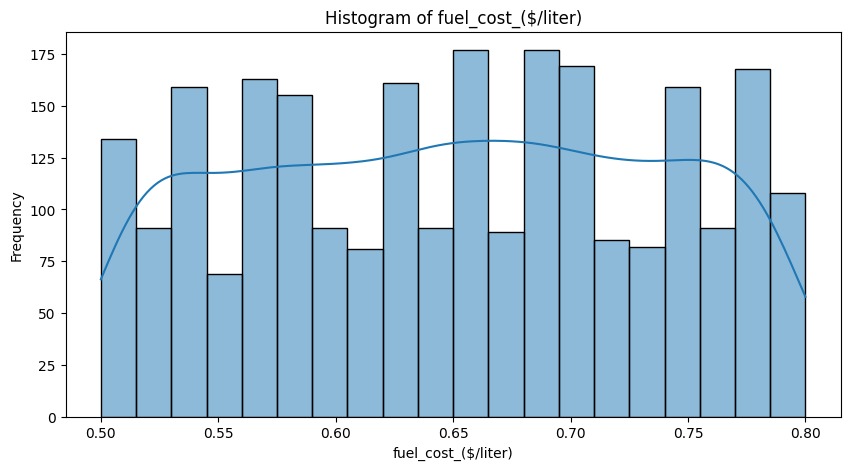

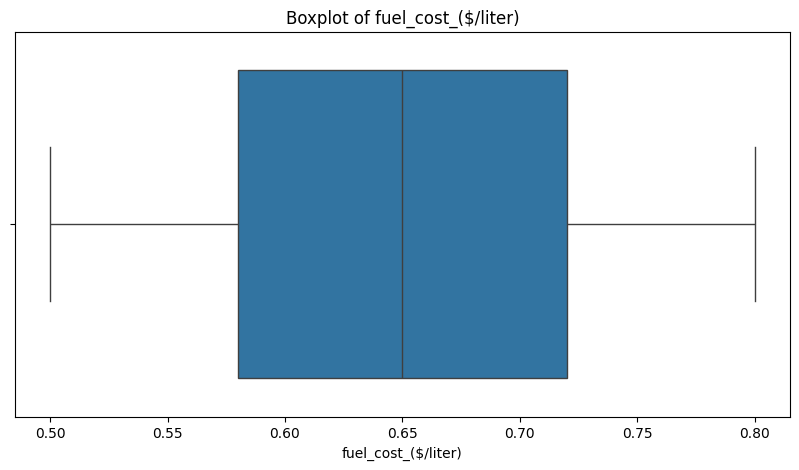

In [20]:
# Histograms and Boxplots for charter price, duration, and fuel cost
numerical_cols_2 = ['charter_price_($/day)', 'duration_(days)', 'fuel_cost_($/liter)']
for col in numerical_cols_2:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# # Correlation Analysis
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


### LNG & LPG Capacity Analysis 

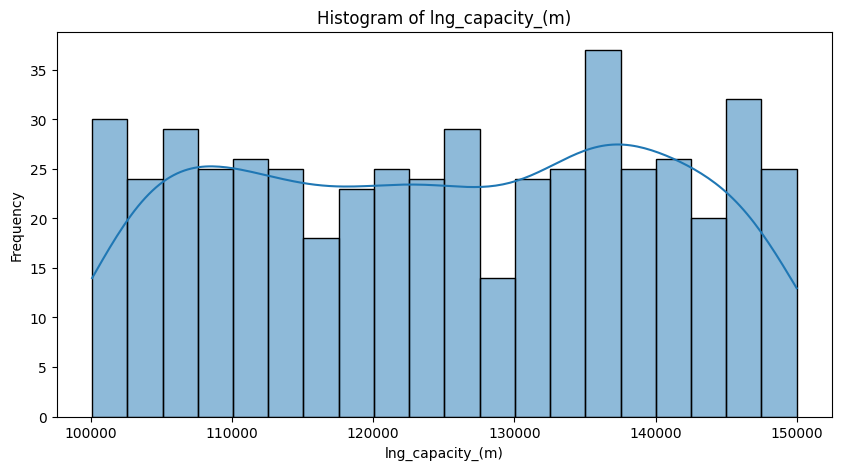

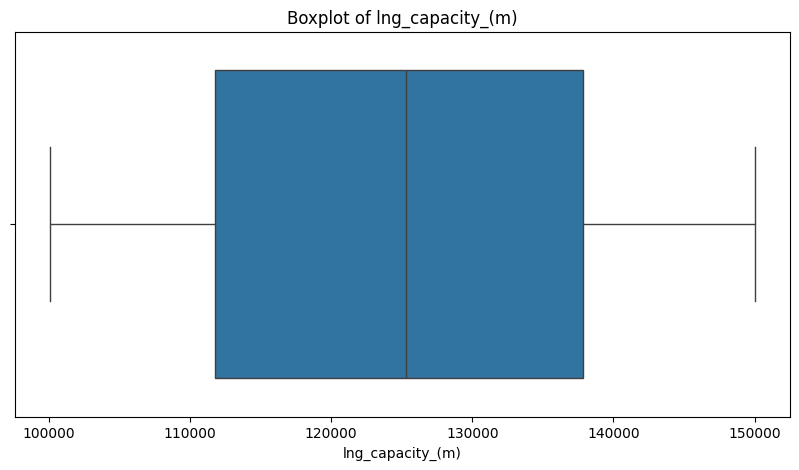

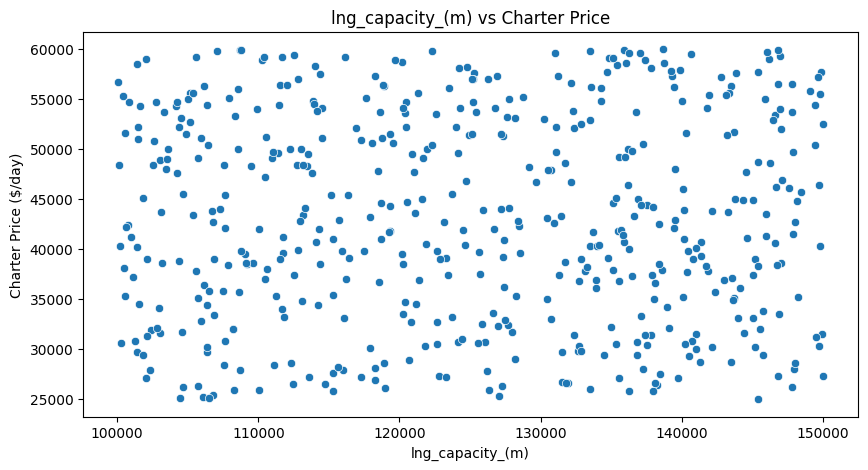

In [21]:
# Histograms and Boxplots for LNG and LPG capacity
numerical_cols_3 = ['lng_capacity_(m)']

lng_df  = df[df['lng_capacity_(m)'] > 0]


for col in numerical_cols_3:

    plt.figure(figsize=(10, 5))
    sns.histplot(lng_df['lng_capacity_(m)'], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=lng_df['lng_capacity_(m)'], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=lng_df, x=lng_df['lng_capacity_(m)'], y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


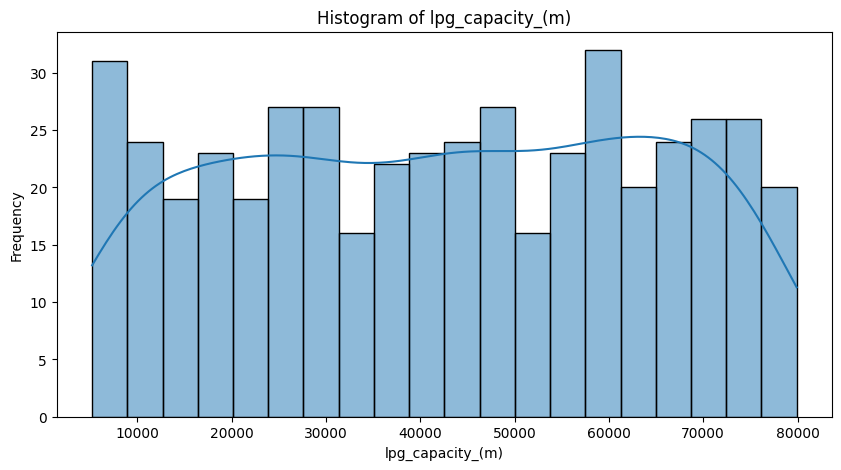

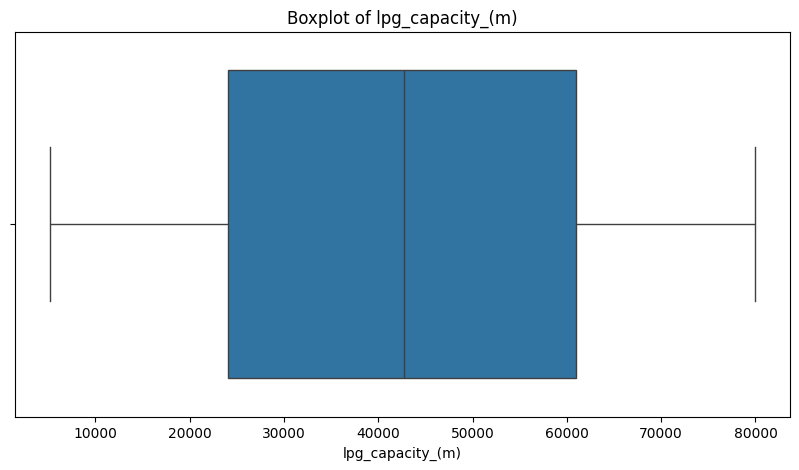

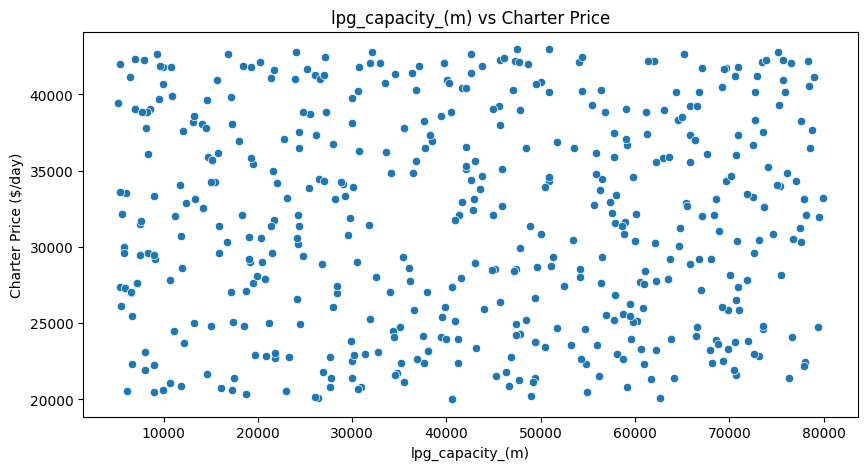

In [22]:
numerical_cols_4 = ['lpg_capacity_(m)']

lpg_df = df[df['lpg_capacity_(m)'] > 0] 

for col in numerical_cols_4:
 
    plt.figure(figsize=(10, 5))
    sns.histplot(lpg_df['lpg_capacity_(m)'], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=lpg_df['lpg_capacity_(m)'], showfliers = False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

    # Scatter Plots for relationships with charter price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=lpg_df, x=lpg_df['lpg_capacity_(m)'], y='charter_price_($/day)')
    plt.title(f'{col} vs Charter Price')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.show()


### Size Category and Cargo Type Analysis

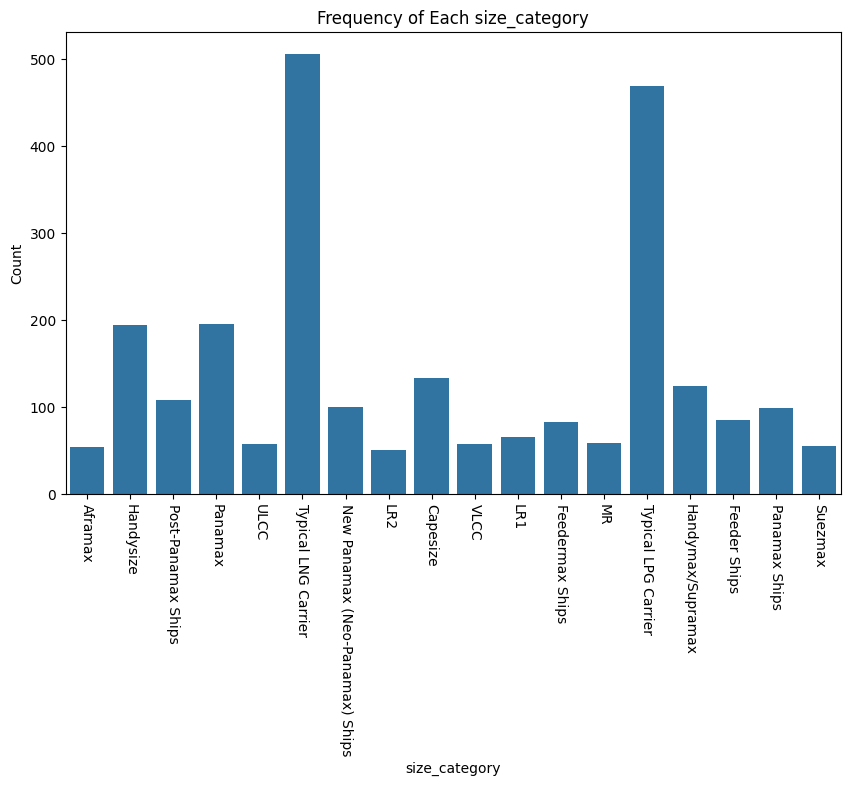

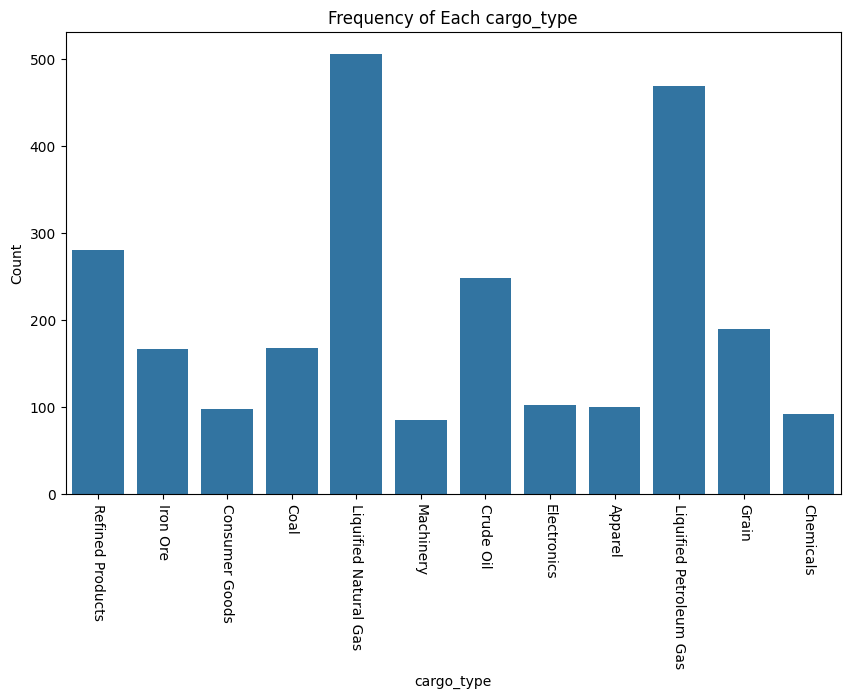

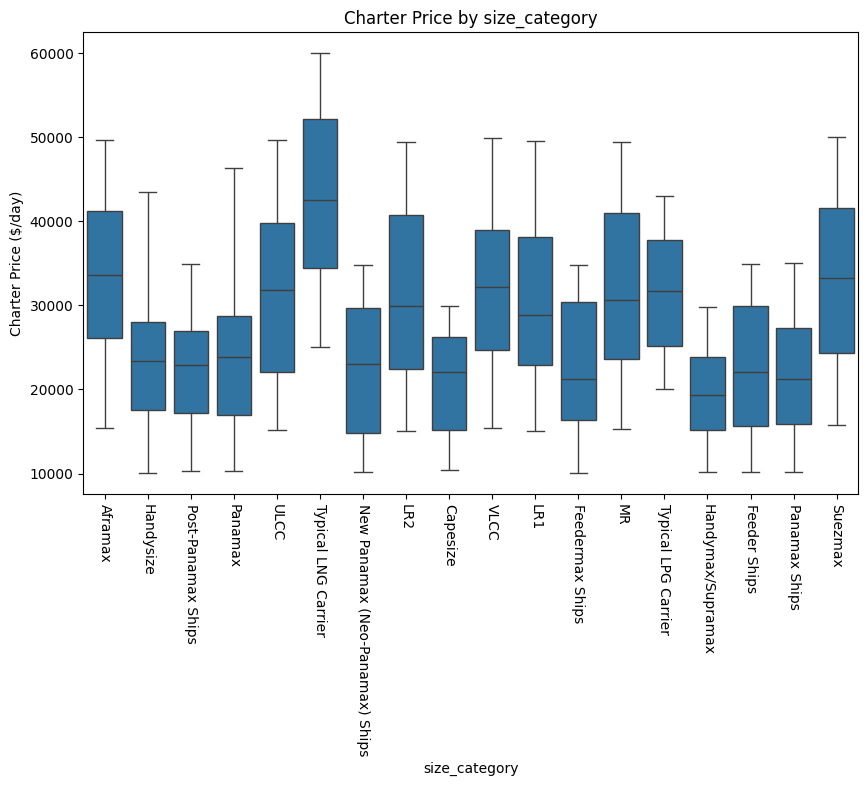

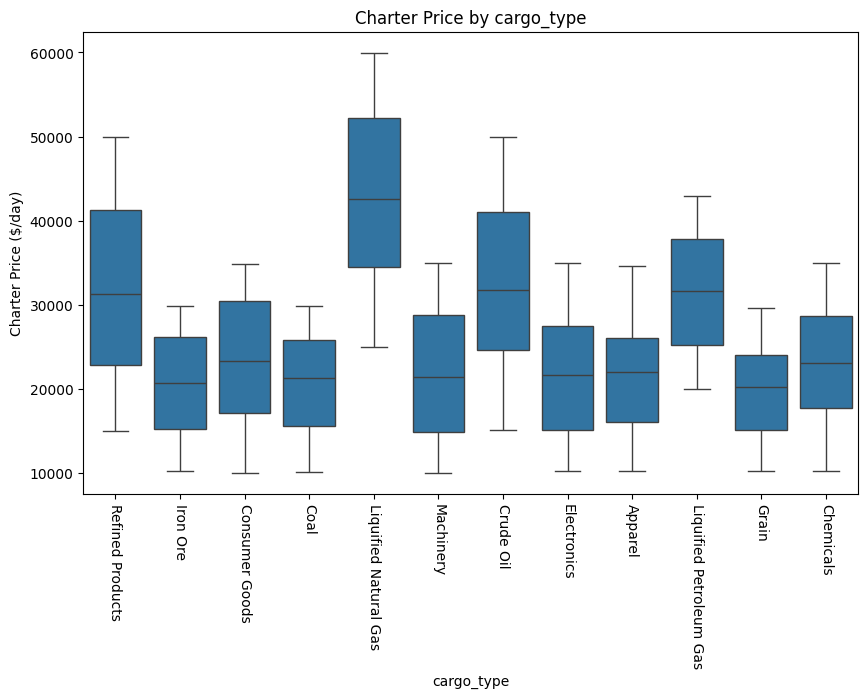

In [23]:
# Count Plots for size category and cargo type
categorical_cols = ['size_category', 'cargo_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of Each {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 270)
    plt.show()

# Comparison: Charter price by size category and cargo type
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='charter_price_($/day)', showfliers = False)
    plt.title(f'Charter Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Charter Price ($/day)')
    plt.xticks(rotation = 270)
    plt.show()
